# Лабораторная работа №1.  ДВПФ и ДПФ 

__Вариант 6__

In [2]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [4]:
N = 16
n0 = 6

Ndtft = 256
nu = np.arange(0, 1, 1/Ndtft)

nu0 = n0 / N

k = np.arange(N)
y = np.cos(2 * np.pi * k * nu0)

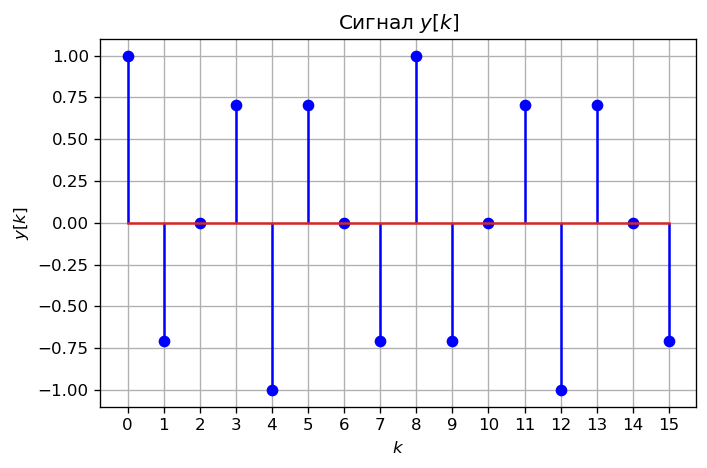

In [5]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
plt.stem(k, y, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.title("Сигнал $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

### Аналитическая форма

$y[k]=x[k]h[k], \text{ где}\; x[k]=\sum\limits_{m=0}^{N-1}\mathbf{1}[k-m],\; h[k]=\cos\left(2\pi k\dfrac{n_0}{N}\right),\; k\in\mathbb{Z}$

$ x[k] \xleftrightarrow{\text{DTFT}} X(\nu) $

$ X(\nu) = \sum\limits_{k=-\infty}^{\infty} x[k] \exp(-j2\pi \nu k) = 
\sum\limits_{k=0}^{N-1} \exp(-j2\pi \nu k) = \dfrac{1-\exp (-j2\pi \nu N)}{1-\exp (-j2\pi \nu )} =
\dfrac{{{e}^{-j\pi \nu N}}}{{{e}^{-j\pi \nu }}} \cdot \dfrac{({{e}^{j\pi \nu N}}-{{e}^{-j\pi \nu N}})}{({{e}^{j\pi \nu }}-{{e}^{-j\pi \nu }})} =
\dfrac{\sin (N\pi \nu )}{\sin (\pi \nu )}\exp (-j(N-1)\pi \nu ).$

$ h[k] \xleftrightarrow{\text{DTFT}} H(\nu)$

Изветсно, что $ \sum\limits_{m=-\infty}^{\infty}\mathbf{1} [k-m] \xleftrightarrow{\text{DTFT}} \sum\limits_{n=-\infty}^{\infty} \delta(\nu - n),\; \text{также по теореме смещения} \sum\limits_{m=-\infty}^{\infty}\mathbf{1} [k-m] \exp(j2\pi k \nu_0) \xleftrightarrow{\text{DTFT}} \sum\limits_{n=-\infty}^{\infty} \delta(\nu - \nu_0 - n).$

$ h[k]=\cos\left(2\pi k \dfrac{n_0}{N} \right) = \dfrac{1}{2}\left(\exp\left(j2\pi k \dfrac{n_0}{N}\right) + \exp\left(-j2\pi k \dfrac{n_0}{N}\right)\right),$ поэтому:

$ H(\nu) = \dfrac{1}{2}\sum\limits_{n=-\infty}^{\infty} \delta\left(\nu - \dfrac{n_0}{N} - n\right) + \delta\left(\nu + \dfrac{n_0}{N} - n\right)$

$ y[k] \xleftrightarrow{\text{DTFT}} Y(\nu) $

$ Y(\nu) = \int\limits_{-0.5}^{0.5} X(\tilde{\nu}) H(\nu - \tilde{\nu})\, d\tilde{\nu} = \dfrac{1}{2} \left( X\left(\nu - \dfrac{n_0}{N}\right) + X\left(\nu + \dfrac{n_0}{N}\right)\right)$

In [6]:
def dirichlet_kernel(x, N, eps=1e-12):
    result = np.zeros(len(x), dtype=np.complex128)
    mask = np.abs(x - np.round(x)) > eps
    result[mask] = np.sin(N * np.pi * x[mask]) / np.sin(np.pi * x[mask]) * np.exp(-1j * (N-1) * np.pi * x[mask])
    result[~mask] = N
    return result

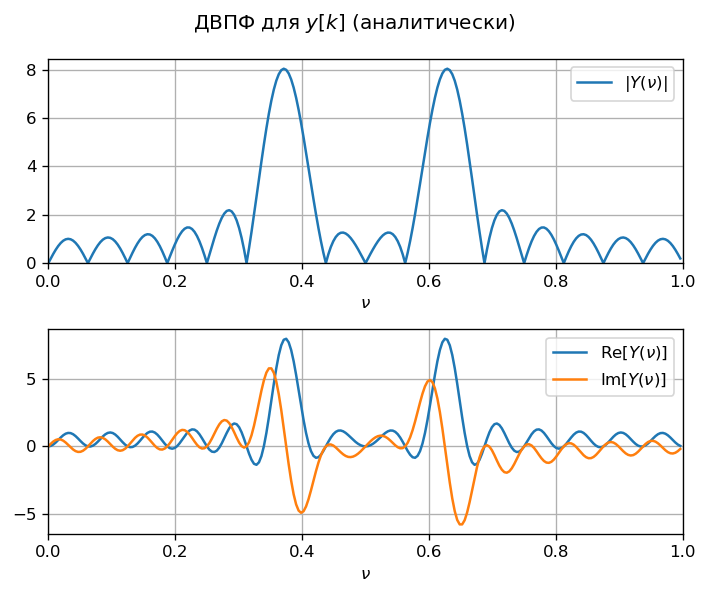

In [7]:
Y_dtft_an = 0.5 * (dirichlet_kernel(nu - nu0, N=N) + dirichlet_kernel(nu + nu0, N=N))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), dpi=120)
fig.suptitle("ДВПФ для $y[k]$ (аналитически)")
ax[0].plot(nu, np.abs(Y_dtft_an), label='$|Y(\\nu)|$')
ax[0].set_xlabel("$\\nu$") 
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, None])
ax[0].legend()
ax[0].grid()

ax[1].plot(nu, np.real(Y_dtft_an), label='Re$[Y(\\nu)]$')
ax[1].plot(nu, np.imag(Y_dtft_an), label='Im$[Y(\\nu)]$')
ax[1].set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax[1].legend()
ax[1].set_xlim([0, 1])
ax[1].grid()

plt.tight_layout()
plt.show()

### Численный результат (через ДПФ)

In [8]:
Ndft = Ndtft
Y_dtft_num = np.fft.fft(y, Ndft)

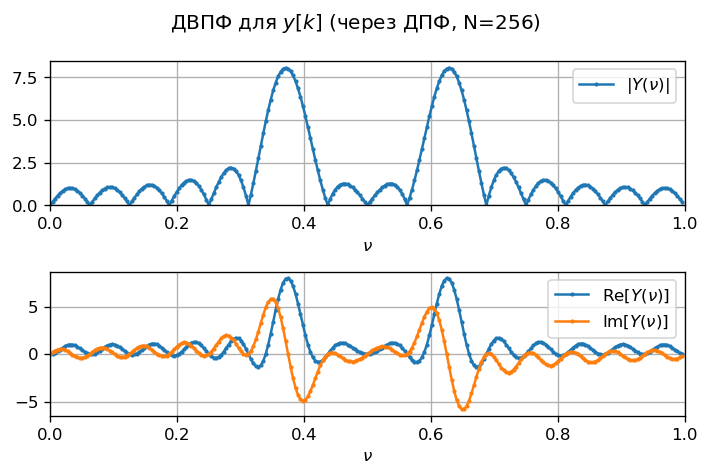

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), dpi=120)
fig.suptitle(f"ДВПФ для $y[k]$ (через ДПФ, N={Ndft})")
ax[0].plot(nu, np.abs(Y_dtft_num), label='$|Y(\\nu)|$', marker='.', markersize=3)
ax[0].set_xlabel("$\\nu$") 
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, None])
ax[0].legend()
ax[0].grid()

ax[1].plot(nu, np.real(Y_dtft_num), label='Re$[Y(\\nu)]$', marker='.', markersize=3)
ax[1].plot(nu, np.imag(Y_dtft_num), label='Im$[Y(\\nu)]$', marker='.', markersize=3)
ax[1].set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax[1].legend()
ax[1].set_xlim([0, 1])
ax[1].grid()

plt.tight_layout()
plt.show()

### Сравнение

In [10]:
# СКО
mse_error = np.linalg.norm(Y_dtft_an - Y_dtft_num, ord=2)**2
mse_error

3.474365250170926e-26

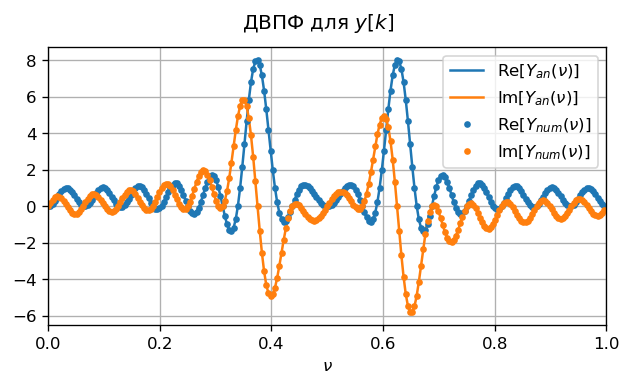

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3), dpi=120)
fig.suptitle("ДВПФ для $y[k]$")

ax.plot(nu, np.real(Y_dtft_an), label='Re$[Y_{an}(\\nu)]$', color='C0')
ax.plot(nu, np.imag(Y_dtft_an), label='Im$[Y_{an}(\\nu)]$', color='C1')
ax.plot(nu, np.real(Y_dtft_num), label='Re$[Y_{num}(\\nu)]$', color='C0', marker='.', linewidth=0)
ax.plot(nu, np.imag(Y_dtft_num), label='Im$[Y_{num}(\\nu)]$', color='C1', marker='.', linewidth=0)
ax.set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax.legend()
ax.set_xlim([0, 1])
ax.grid()

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

### Создадим случайную последовательность

$ \textbf{x} = \left[x[0],\, x[1]\, ...,\ x[N-1]\right]^\mathsf{T} \in \mathbb{R}^N$

$ \textbf{x} \sim \mathcal{N}(\mathbf{0}_N, \mathbf{I}_N) $ 

In [12]:
N = 16
x = np.random.randn(N)
k = np.arange(N)

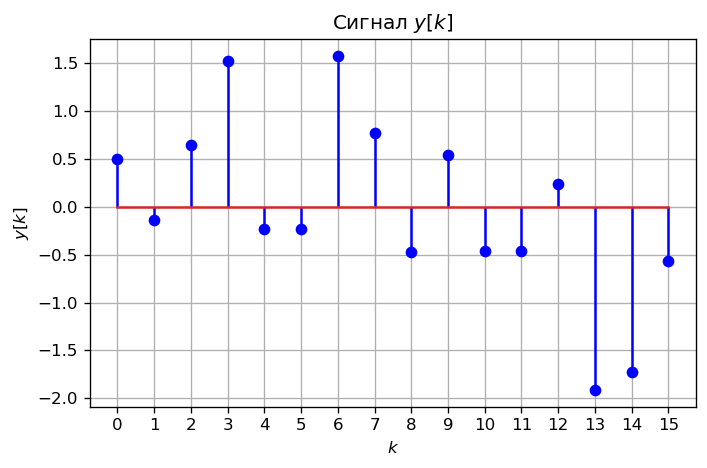

In [13]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
plt.stem(k, x, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.title("Сигнал $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

### Численно найдем ДВПФ

In [14]:
Ndft = 2048  # выбрать четным
X_dtft_num = np.fft.fftshift(np.fft.fft(x, Ndft))
nu_dtft = np.arange(-0.5, 0.5, 1/Ndft)

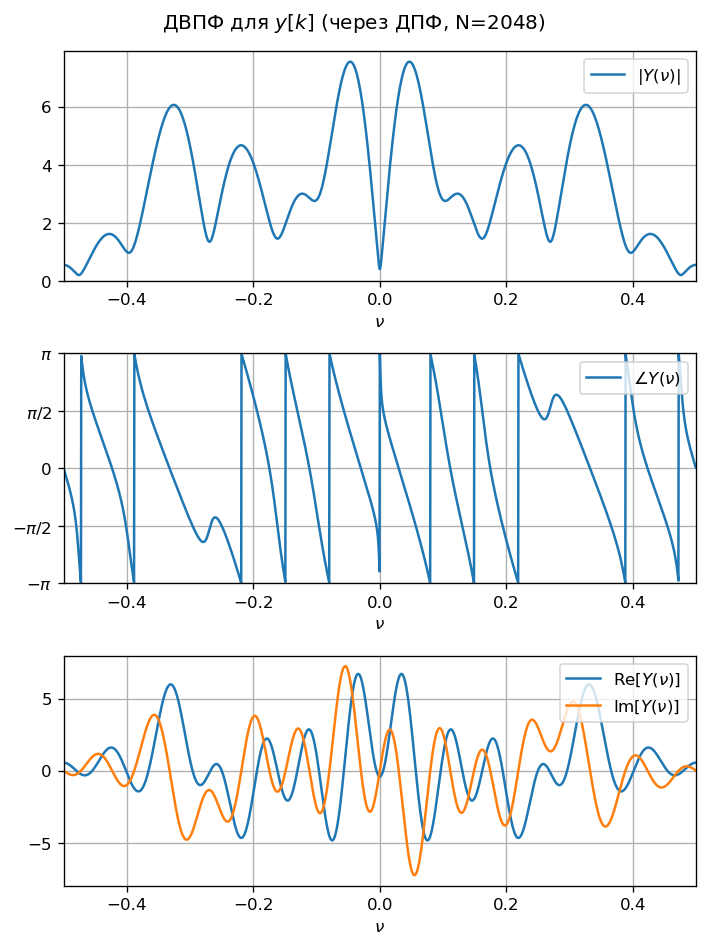

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 8), dpi=120)
fig.suptitle(f"ДВПФ для $y[k]$ (через ДПФ, N={Ndft})")
ax[0].plot(nu_dtft, np.abs(X_dtft_num), label='$|Y(\\nu)|$')
ax[0].set_xlabel("$\\nu$") 
ax[0].set_xlim([-0.5, 0.5])
ax[0].set_ylim([0, None])
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].plot(nu_dtft, np.angle(X_dtft_num), label='$ \\angle Y(\\nu)$')
ax[1].set_xlabel("$\\nu$") 
ax[1].set_xlim([-0.5, 0.5])
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_yticks([np.pi/2 * k for k in range(-2, 3)], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].plot(nu_dtft, np.real(X_dtft_num), label='Re$[Y(\\nu)]$')
ax[2].plot(nu_dtft, np.imag(X_dtft_num), label='Im$[Y(\\nu)]$')
ax[2].set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax[2].legend(loc='upper right')
ax[2].set_xlim([-0.5, 0.5])
ax[2].grid()

plt.tight_layout()
plt.show()

### Симметрии ДВПФ вещественной последовательности

$ x[k] \in \mathbb{R},\, k=0,...,N-1 $

$ x[k] \xleftrightarrow{\text{DTFT}} X(\nu) $

$ X(\nu),\, \nu \in [-0.5, \; 0.5] $   

* $|X(\nu)| = |X(-\nu)| $ ,
* $\angle X(\nu) = -\angle X(-\nu)$,
* $\text{Re} X(\nu) = \text{Re} X(-\nu) $,
* $\text{Im} X(\nu) = -\text{Im} X(-\nu)$.

То есть $ X(\nu) = X^*(-\nu)$

In [16]:
# Ndft четная, так что nu=-0.5, -0.5+1/Ndft, ..., 0, ..., 0.5-1/Ndft
# поэтому nu=-0.5 не рассматривается для проверки на 
np.allclose(X_dtft_num[1:Ndft//2], X_dtft_num[Ndft//2+1:][::-1].conj())

True

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |

Обозначим $N = l$

 Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

In [17]:
x = np.array([3.8, 0, 8.3, 0, 9.1, 0, 1.9, 0])
n0 = -2
N = 8
k = np.arange(N)

### Аналитически найдем $y[k]$

$ x[k] \xleftrightarrow{\text{DFT}} X[n] $

Теорема смещения ДПФ:

$ x[k] \exp\left( \mp j 2\pi \dfrac{n_0}{N} k \right) \xleftrightarrow{\text{DFT}} X[n \pm n_0]_N $

In [18]:
y_an = x * np.exp(-2j*np.pi*n0/N*k)

### Проверим при помощи вычисления ДПФ

In [19]:
X = np.fft.fft(x)
Y = np.roll(X, n0)

y_num = np.fft.ifft(Y)

In [20]:
np.allclose(y_an, y_num)

True

## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— **12**-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.



1) Воспользовавшись **свойствами симметрии**, определите значения всех отсчетов ДПФ на одном периоде. 

$ X[n] = X^*[N-n]_N$

In [21]:
N = 12
X_pos = np.array([10, -6+3j, 6+3j, 6-1j, 1-6j, 9+5j, 5])
X = np.hstack((X_pos, X_pos[1:-1][::-1].conj()))

x = np.fft.ifft(X)
k = np.arange(N)

In [22]:
np.allclose(x, x.real)  # сигнал вещественный

True

In [23]:
x = x.real

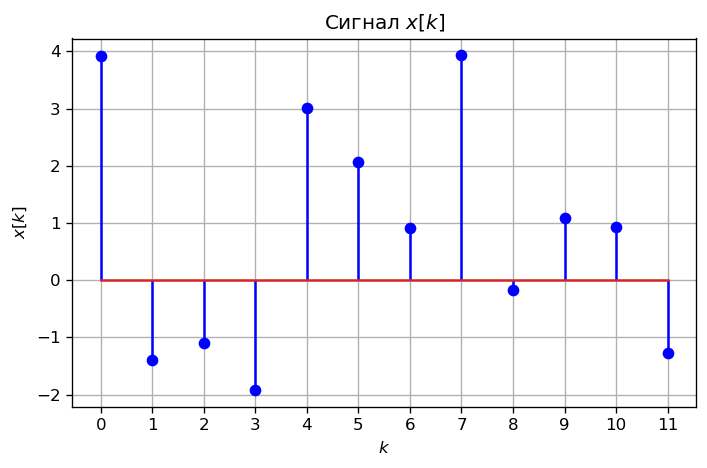

In [24]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
plt.stem(k, x, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
# сравним с irfft 
np.allclose(np.fft.irfft(X_pos), x)

True


2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.


In [26]:
x_mean = x.mean()
x_mean_dft = X[0].real / N
x_mean == x_mean_dft

True

In [27]:
print(f'mean of x is {x_mean:.4f}')

mean of x is 0.8333



3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$

In [28]:
x_energy = np.sum(abs(x)**2)
X_energy = np.sum(abs(X)**2) / N  # базис был не ортонормированный 
np.allclose(x_energy, X_energy)

True

In [29]:
x_power = np.sum(abs(x)**2) / N
X_power = np.sum(abs(X)**2) 
np.allclose(x_energy, X_energy)

True

In [30]:
print(f"Energy of x is {x_energy:.4f}\nPower of x's periodic extension is {x_power:.4f}")

Energy of x is 55.4167
Power of x's periodic extension is 4.6181




4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


In [31]:
# было проделано выше

## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

In [51]:
N = 16
r1 = 1
r2 = 4

k = np.arange(N)
# x = np.cos(2*np.pi*r1/N*k) + np.sin(2*np.pi*r2/N*k)
x = (0.42 - 0.5 * np.cos(2*np.pi*1/N*k) + 0.08 * np.cos(2*np.pi*2/N*k)) * np.cos(2*np.pi*5/N*k)

X = np.fft.fft(x, N)

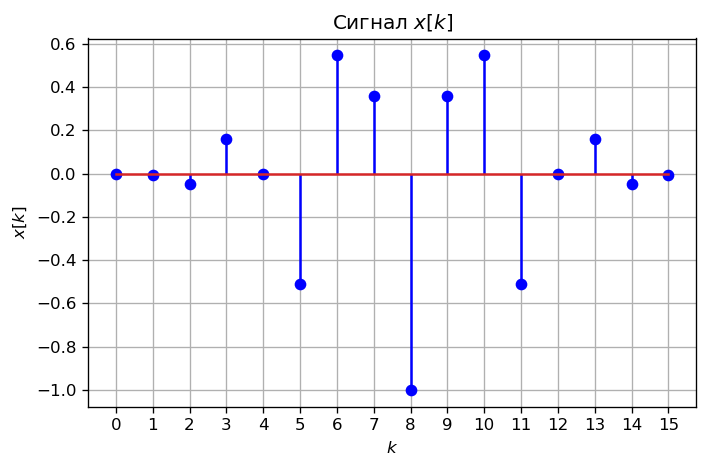

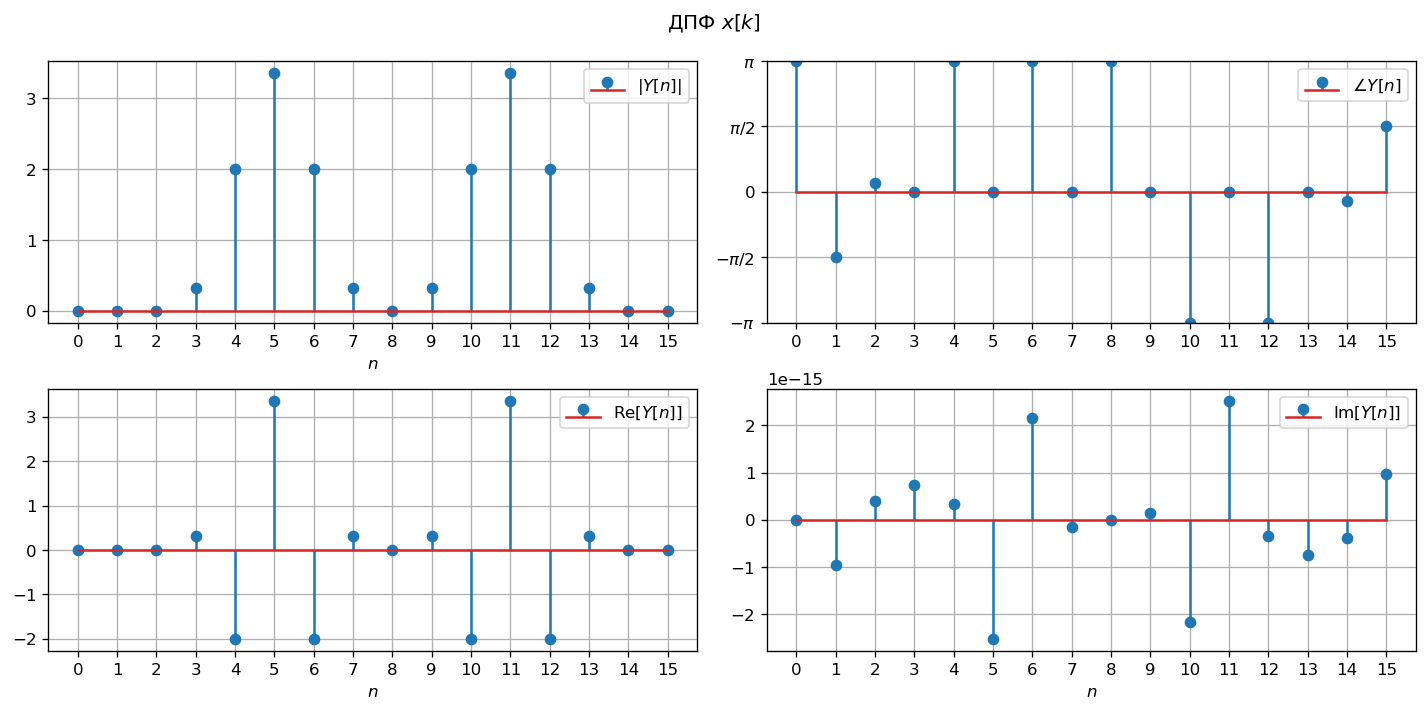

In [39]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
plt.stem(k, x, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=120)
ax = ax.flatten()
for a in ax: a.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
fig.suptitle(f"ДПФ $x[k]$")
ax[0].stem(k, np.abs(X), label='$|Y[n]|$')
ax[0].set_xlabel("$n$") 
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].stem(k, np.angle(X), label='$ \\angle Y[n]$')
ax[0].set_xlabel("$n$") 
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_yticks([np.pi/2 * k for k in range(-2, 3)], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].stem(k, np.real(X), label='Re$[Y[n]]$')
ax[2].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[2].legend(loc='upper right')
ax[2].grid()

ax[3].stem(k, np.imag(X), label='Im$[Y[n]]$')
ax[3].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[3].legend(loc='upper right')
ax[3].grid()

plt.tight_layout()
plt.show()

### Аналитическая форма

$ x[k] \xleftrightarrow{\text{DFT}} X[n] $

$ x[k] = \dfrac{1}{2} \left[ \exp\left( j 2\pi \dfrac{r_1}{N} k \right) + \exp\left( -j 2\pi \dfrac{r_1}{N} k \right)\right] - 
         \dfrac{j}{2} \left[ \exp\left( j 2\pi \dfrac{r_2}{N} k \right) - \exp\left( -j 2\pi \dfrac{r_2}{N} k \right)\right],\; k=0,..,N-1$

* Непосредственное вычисление ДПФ

$ X[n] = \sum\limits_{k=0}^{N-1} x[k] \exp \left( -j 2\pi \dfrac{n}{N}k\right) $

Заметим:

$\sum\limits_{k=0}^{N} \exp\left( j 2\pi k \dfrac{m}{N}\right) = 
\begin{cases} 
N,\; m \mod 16 = 0\\
0,\; \text{else}
\end{cases}$

После разложения косинуса и синуса через комплексные экспоненты, с учетом того, что частоты косинуса и синуса ($r_1/N$ и $r_2/N$ соот.) совпадают с бинами ДПФ, получаем $X[n]$:

|$n$|$0$|$1$|$2$|$3$|$4$|$5$|$6$|$7$|$8$|$9$|$10$|$11$|$12$|$13$|$14$|$15$|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|$X[n]$|$0+0j$|$8+0j$|$0+0j$|$0+0j$|$0-8j$|$0+0j$|$0+0j$|$0+0j$|$0+0j$|$0+0j$|$0+0j$|$0+0j$|$0+8j$|$0+0j$|$0+0j$|$8+0j$|$0+0j$|

*  Теорема смещения ДПФ

$ x[k] \exp\left( \mp j 2\pi \dfrac{n_0}{N} k \right) \xleftrightarrow{\text{DFT}} X[n \pm n_0]_N $

$ \mathbf{1}[k] \xleftrightarrow{\text{DFT}} \sum\limits_{m=0}^{N-1}  \mathbf{1}[n-m] $

$ \sum\limits_{l=0}^{N-1}  \mathbf{1}[k-l] \xleftrightarrow{\text{DFT}} N \mathbf{1}[n] $

С учетом последнего выражения и разложения синуса и косинуса через комплексные экспоненты, получаем то же выражение для $X[n]$


In [33]:
X_an = np.array([0, 8, 0, 0, -8j, 0, 0, 0, 0, 0, 0, 0, 8j, 0, 0, 8])


* ДПФ как линейное преобразование

$ F_N^{n k}= \exp\left(-j \dfrac{2\pi}{N} n k\right)$

$\mathbf{F}_N$ - матрица ДПФ

Тогда: $ X = \mathbf{F}_N x $


In [34]:
F_N = sp.linalg.dft(N)  # матрица ДПФ

In [35]:
X_linalg = np.einsum('nk,k->n', F_N, x)

### Численное нахождение ДПФ

In [36]:
X = np.fft.fft(x)

In [37]:
np.allclose(X, X_an), np.allclose(X, X_linalg)  # Все методы вычисления дают один результат

(True, True)

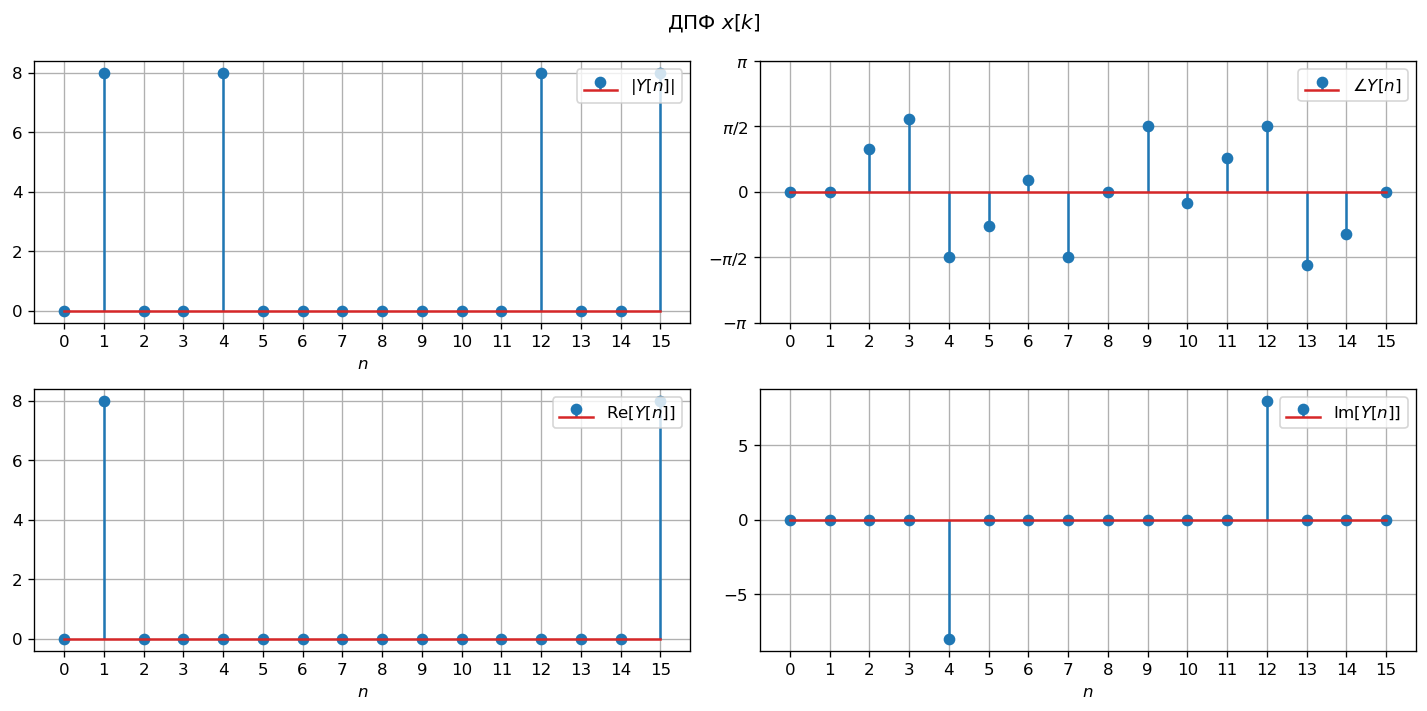

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=120)
ax = ax.flatten()
for a in ax: a.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
fig.suptitle(f"ДПФ $x[k]$")
ax[0].stem(k, np.abs(X), label='$|Y[n]|$')
ax[0].set_xlabel("$n$") 
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].stem(k, np.angle(X), label='$ \\angle Y[n]$')
ax[0].set_xlabel("$n$") 
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_yticks([np.pi/2 * k for k in range(-2, 3)], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].stem(k, np.real(X), label='Re$[Y[n]]$')
ax[2].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[2].legend(loc='upper right')
ax[2].grid()

ax[3].stem(k, np.imag(X), label='Im$[Y[n]]$')
ax[3].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[3].legend(loc='upper right')
ax[3].grid()

plt.tight_layout()
plt.show()

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  

Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов ($z[k]$).

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



In [39]:
N = 12

w = np.ones(N)
k = np.arange(N)

W = np.fft.fft(w)

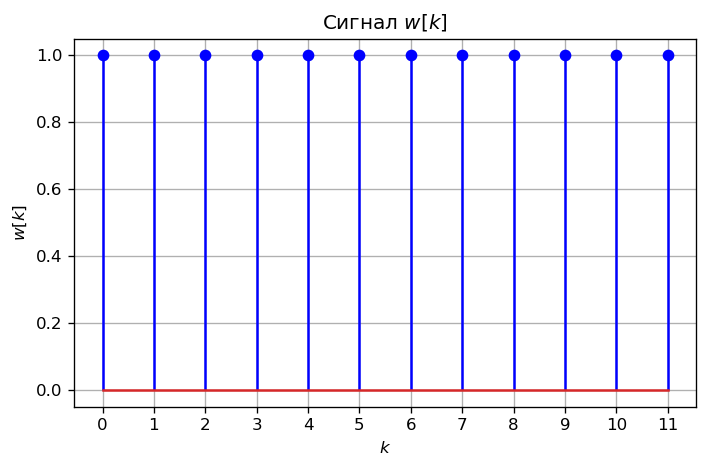

In [40]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
plt.stem(k, w, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$w[k]$")
plt.title("Сигнал $w[k]$")
plt.grid()
plt.tight_layout()
plt.show()

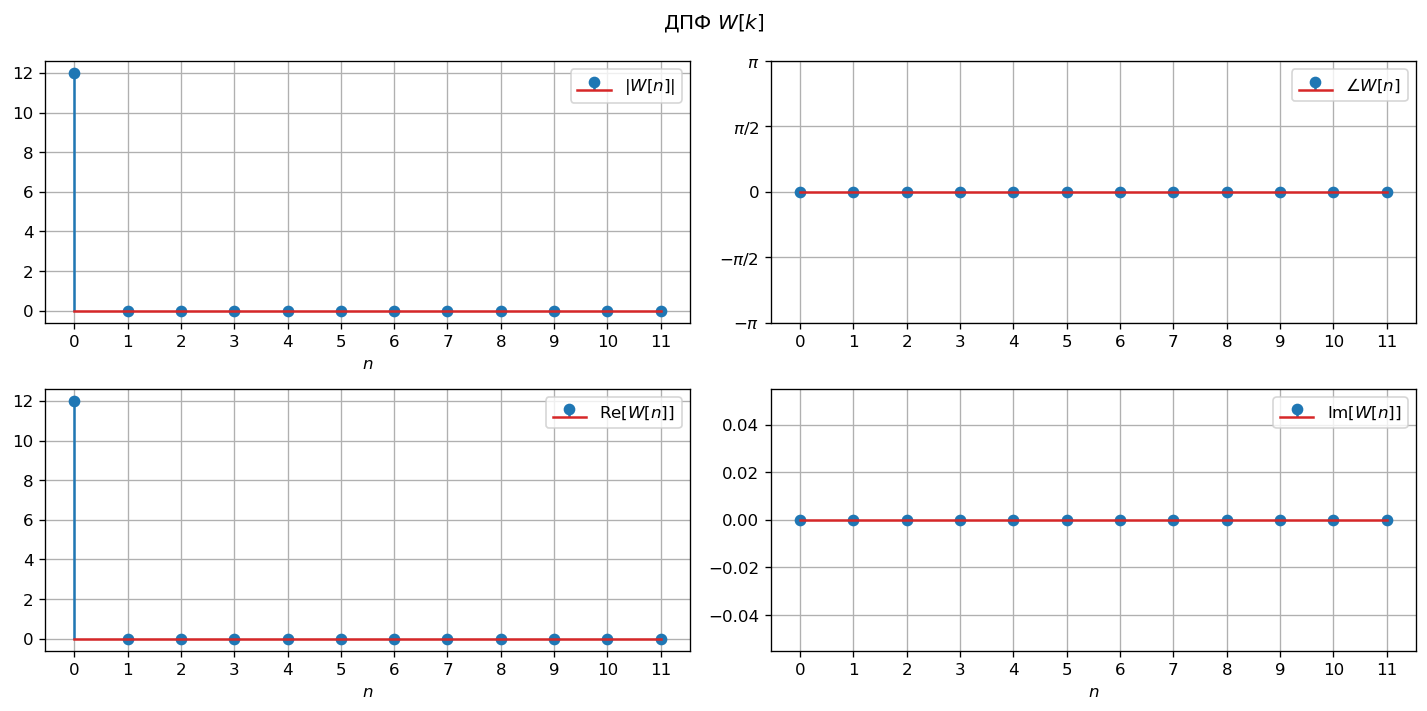

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=120)
ax = ax.flatten()
for a in ax: a.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
fig.suptitle(f"ДПФ $W[k]$")
ax[0].stem(k, np.abs(W), label='$|W[n]|$')
ax[0].set_xlabel("$n$") 
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].stem(k, np.angle(W), label='$ \\angle W[n]$')
ax[0].set_xlabel("$n$") 
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_yticks([np.pi/2 * k for k in range(-2, 3)], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].stem(k, np.real(W), label='Re$[W[n]]$')
ax[2].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[2].legend(loc='upper right')
ax[2].grid()

ax[3].stem(k, np.imag(W), label='Im$[W[n]]$')
ax[3].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[3].legend(loc='upper right')
ax[3].grid()

plt.tight_layout()
plt.show()

In [42]:
y = np.zeros(2*N)
y[:N] = w

Y = np.fft.fft(y)

k2 = np.arange(2*N)

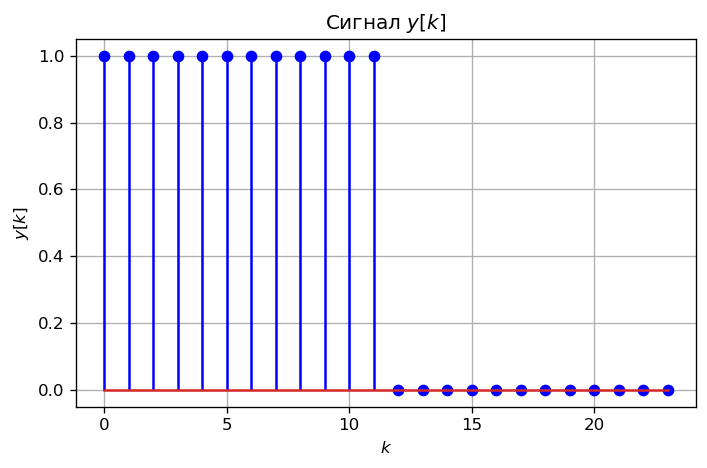

In [43]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
plt.stem(k2, y, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.title("Сигнал $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

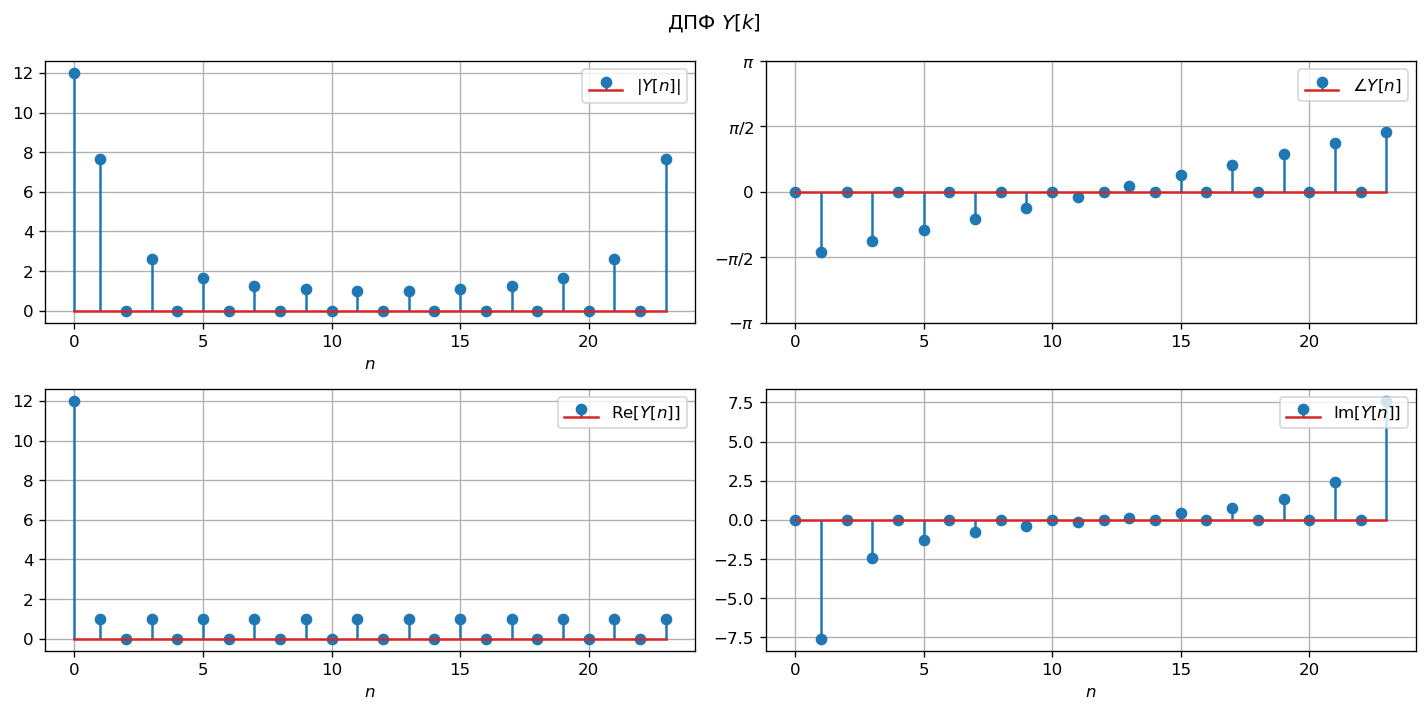

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=120)
ax = ax.flatten()
fig.suptitle(f"ДПФ $Y[k]$")
ax[0].stem(k2, np.abs(Y), label='$|Y[n]|$')
ax[0].set_xlabel("$n$") 
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].stem(k2, np.angle(Y), label='$ \\angle Y[n]$')
ax[0].set_xlabel("$n$") 
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_yticks([np.pi/2 * k for k in range(-2, 3)], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].stem(k2, np.real(Y), label='Re$[Y[n]]$')
ax[2].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[2].legend(loc='upper right')
ax[2].grid()

ax[3].stem(k2, np.imag(Y), label='Im$[Y[n]]$')
ax[3].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[3].legend(loc='upper right')
ax[3].grid()

plt.tight_layout()
plt.show()

In [45]:
np.allclose(Y, np.fft.fft(w, 2*N))  # Y совпадает с fft(w, 2*N)

True

In [46]:
z = np.zeros(4*N)
z[:N] = w

Z = np.fft.fft(z)

k4 = np.arange(4*N)

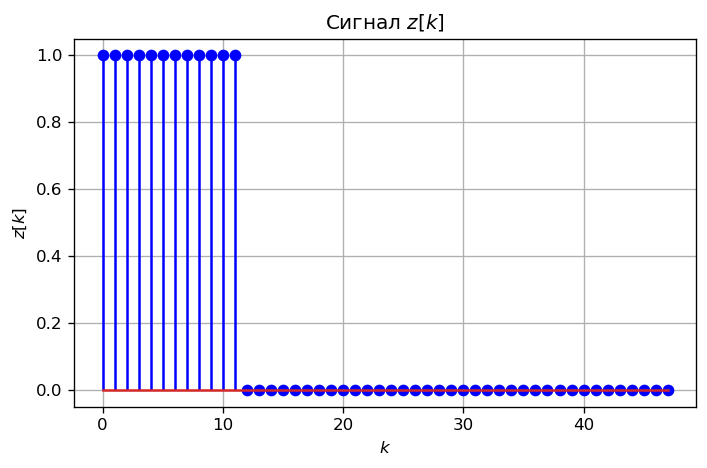

In [47]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
plt.stem(k4, z, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$z[k]$")
plt.title("Сигнал $z[k]$")
plt.grid()
plt.tight_layout()
plt.show()

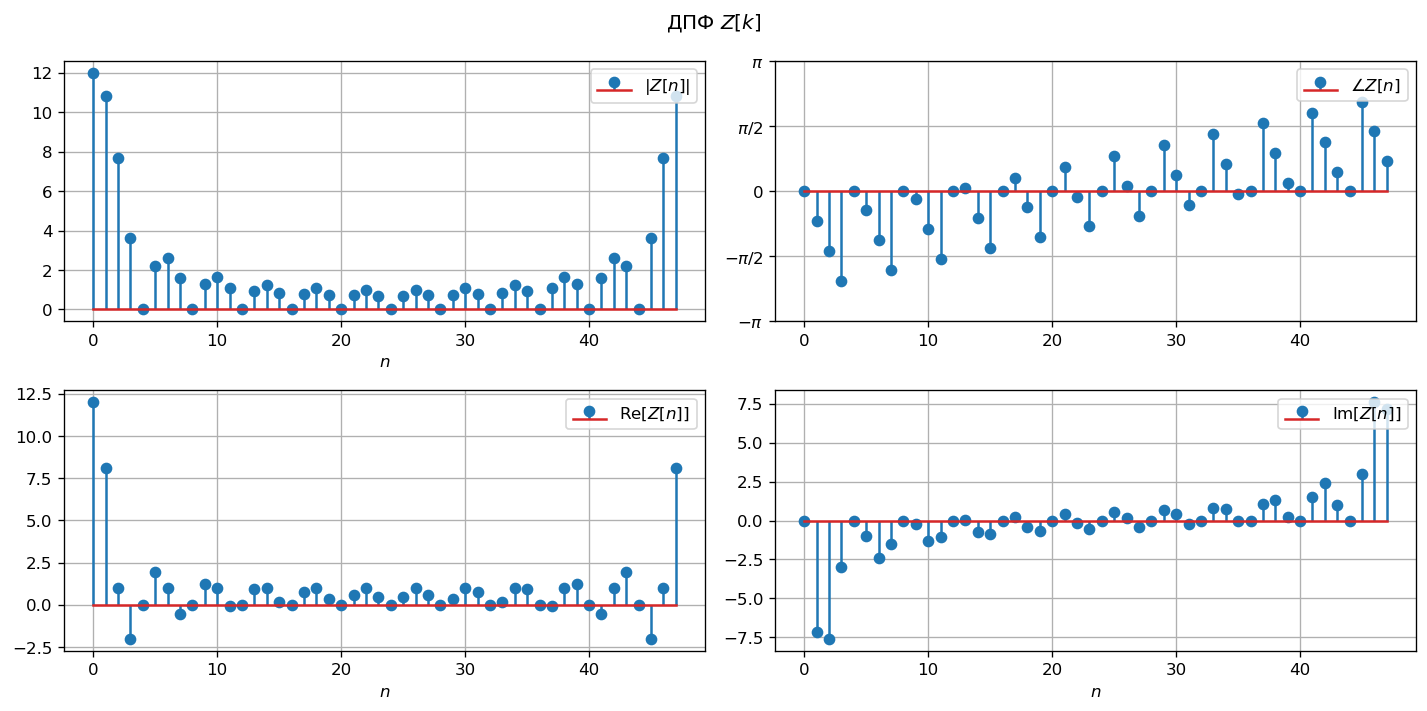

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=120)
ax = ax.flatten()
fig.suptitle(f"ДПФ $Z[k]$")
ax[0].stem(k4, np.abs(Z), label='$|Z[n]|$')
ax[0].set_xlabel("$n$") 
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].stem(k4, np.angle(Z), label='$ \\angle Z[n]$')
ax[0].set_xlabel("$n$") 
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_yticks([np.pi/2 * k for k in range(-2, 3)], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].stem(k4, np.real(Z), label='Re$[Z[n]]$')
ax[2].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[2].legend(loc='upper right')
ax[2].grid()

ax[3].stem(k4, np.imag(Z), label='Im$[Z[n]]$')
ax[3].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[3].legend(loc='upper right')
ax[3].grid()

plt.tight_layout()
plt.show()

В пункте 1.1 была получена аналитическая формула ДВПФ для $w[k]$ (там последовательность обозначалась $x[k]$): 

$ w[k] \xleftrightarrow{\text{DTFT}} W(\nu) $

$ W(\nu) = \dfrac{\sin (N\pi \nu )}{\sin (\pi \nu )}\exp (-j(N-1)\pi \nu ) $

In [49]:
nu_len = 1024
nu = np.arange(-0.5, 0.5, 1/nu_len)
W_dtft_an = dirichlet_kernel(nu, N=N)

In [50]:
k_shift = np.arange(-0.5, 0.5, 1/N)
W_shift = np.fft.fftshift(W)

k2_shift = np.arange(-0.5, 0.5, 1/(2*N))
Y_shift = np.fft.fftshift(Y)

k4_shift = np.arange(-0.5, 0.5, 1/(4*N))
Z_shift = np.fft.fftshift(Z)

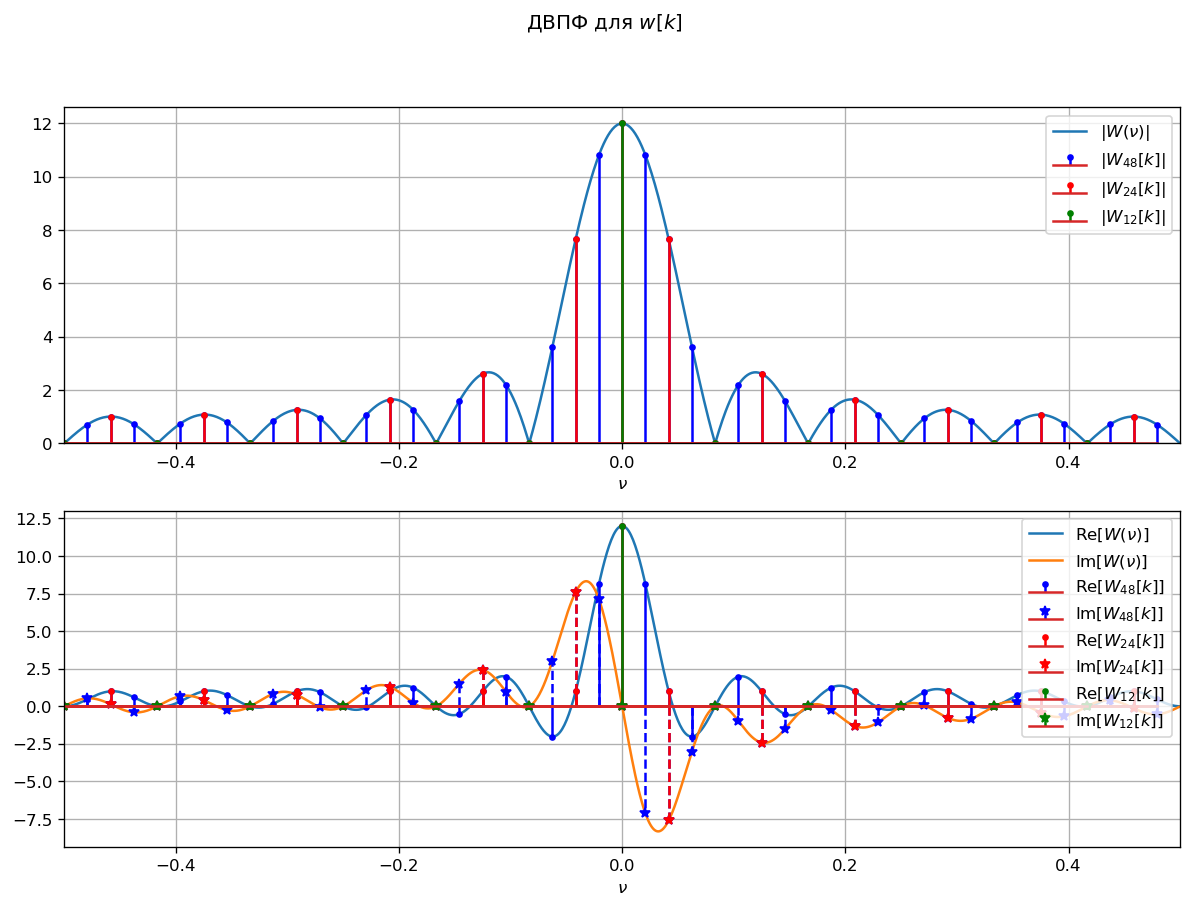

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), dpi=120)
fig.suptitle("ДВПФ для $w[k]$")
ax[0].plot(nu, np.abs(W_dtft_an), label='$|W(\\nu)|$')
ax[0].stem(k4_shift,  np.abs(Z_shift), 'b', markerfmt='b.',  label=f'$|W_{ {4*N} }[k]|$')
ax[0].stem(k2_shift,  np.abs(Y_shift), 'r', markerfmt='r.', label=f'$|W_{ {2*N} }[k]|$')
ax[0].stem(k_shift,  np.abs(W_shift), 'g', markerfmt='g.', label=f'$|W_{ {N} }[k]|$')
ax[0].set_xlabel("$\\nu$") 
ax[0].set_xlim([-0.5, 0.5])
ax[0].set_ylim([0, None])
ax[0].legend()
ax[0].grid()

ax[1].plot(nu, np.real(W_dtft_an), label='Re$[W(\\nu)]$')
ax[1].plot(nu, np.imag(W_dtft_an), label='Im$[W(\\nu)]$')
ax[1].stem(k4_shift,  np.real(Z_shift), 'b', markerfmt='b.', label=f'Re[$W_{ {4*N} }[k]]$')
ax[1].stem(k4_shift,  np.imag(Z_shift), 'b--', markerfmt='b*', label=f'Im[$W_{ {4*N} }[k]$]')
ax[1].stem(k2_shift,  np.real(Y_shift), 'r', markerfmt='r.', label=f'Re[$W_{ {2*N} }[k]$]')
ax[1].stem(k2_shift,  np.imag(Y_shift), 'r--', markerfmt='r*', label=f'Im[$W_{ {2*N} }[k]]$')
ax[1].stem(k_shift,  np.real(W_shift), 'g', markerfmt='g.', label=f'Re[$W_{ {N} }[k]]$')
ax[1].stem(k_shift,  np.imag(W_shift), 'g--', markerfmt='g*', label=f'Im[$W_{ {N} }[k]$]')
ax[1].set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax[1].legend(loc='upper right')
ax[1].set_xlim([-0.5, 0.5])
ax[1].grid()

In [52]:
W_dtft_num = np.fft.fftshift(np.fft.fft(w, nu_len))

In [53]:
np.allclose(W_dtft_an, W_dtft_num)

True

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 


In [54]:
N = 12
r1 = 1
r2 = 4

k = np.arange(N)
x = np.cos(2*np.pi*r1/N*k) + np.sin(2*np.pi*r2/N*k)

* Вычислите аналитически ДВПФ (см 1.1)

$ X(\nu) = \dfrac{1}{2} \sum\limits_{n=-\infty}^{\infty} 
           -j \delta\left(\nu - \dfrac{r_1}{N} - n\right) +j \delta\left(\nu + \dfrac{r_1}{N} - n\right) +
           \delta\left(\nu - \dfrac{r_2}{N} - n\right) + \delta\left(\nu + \dfrac{r_2}{N} - n\right) $

$ \nu_1 = \dfrac{r_1}{N} = \dfrac{1}{12},\; \nu_2=\dfrac{r_2}{N}=\dfrac{1}{3}$


* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 


In [55]:
X_tilde = np.fft.fft(x) / N

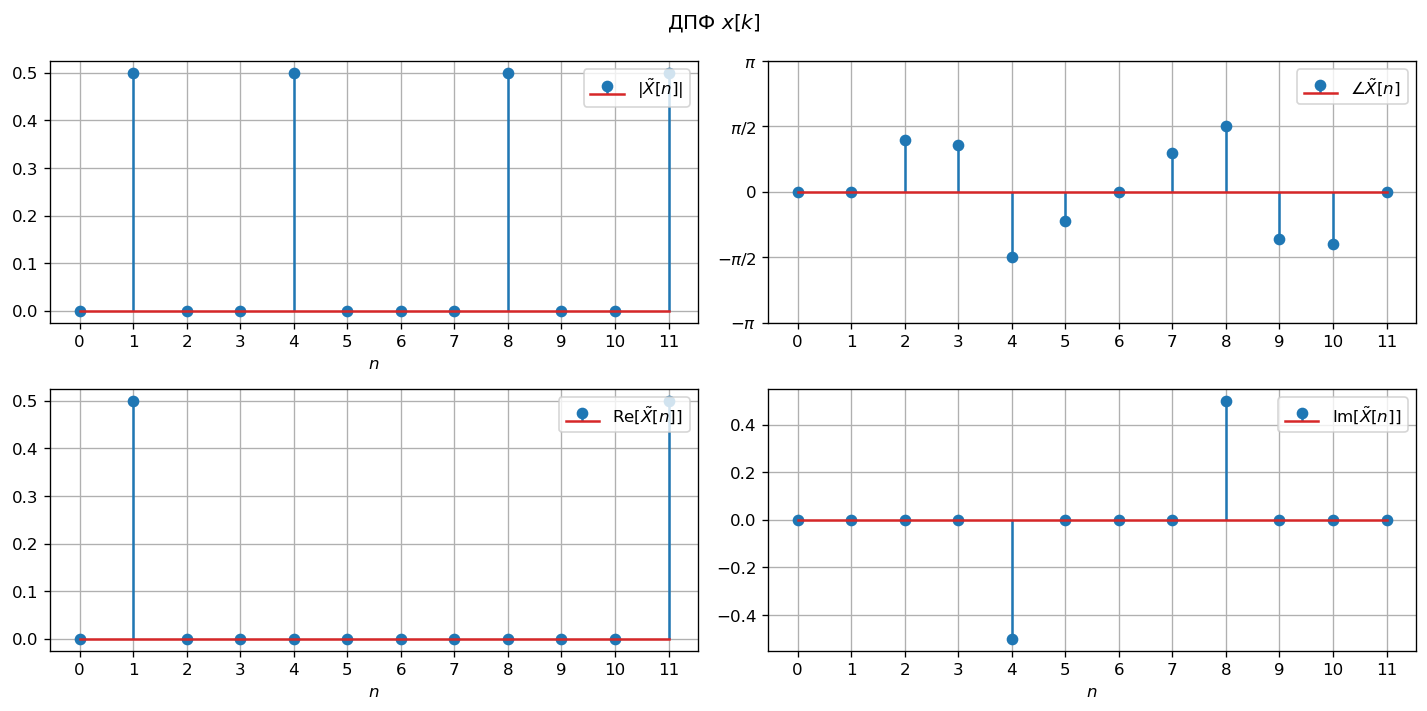

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=120)
ax = ax.flatten()
for a in ax: a.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
fig.suptitle(f"ДПФ $x[k]$")
ax[0].stem(k, np.abs(X_tilde), label='$|\\tilde{X}[n]|$')
ax[0].set_xlabel("$n$") 
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].stem(k, np.angle(X_tilde), label='$ \\angle \\tilde{X}[n]$')
ax[0].set_xlabel("$n$") 
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_yticks([np.pi/2 * k for k in range(-2, 3)], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].stem(k, np.real(X_tilde), label='Re$[\\tilde{X}[n]]$')
ax[2].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[2].legend(loc='upper right')
ax[2].grid()

ax[3].stem(k, np.imag(X_tilde), label='Im$[\\tilde{X}[n]]$')
ax[3].set_xlabel("$n$") # подпись горизонтальной оси, $ — для формул
ax[3].legend(loc='upper right')
ax[3].grid()

plt.tight_layout()
plt.show()

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

Веса $\delta$-функций в точности совпадают со значениями отсчетов ДПФ (бины точно совпадают с частотами в сигнале, нет растекания спектра)

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 |

Дана $N$-точечная последовательность отсчетов
$$ s[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(s, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|S(\nu)|$.

Используем результаты из пункта 1.1:

$ s[k] \xleftrightarrow{\text{DTFT}} S(\nu) $

$ x[k]=\sum\limits_{m=0}^{N-1}\mathbf{1}[k-m],\; g[k]=\sin\left(2\pi k\dfrac{n_0}{N}\right),\; k\in\mathbb{Z} $

$ X(\nu) = \dfrac{\sin (N\pi \nu )}{\sin (\pi \nu )}\exp (-j(N-1)\pi \nu )$

$ G(\nu) = -\dfrac{j}{2}\sum\limits_{n=-\infty}^{\infty} \delta\left(\nu - \dfrac{n_0}{N} - n\right) - \delta\left(\nu + \dfrac{n_0}{N} - n\right)$

$ S(\nu) = \int\limits_{-0.5}^{0.5} X(\tilde{\nu}) G(\nu - \tilde{\nu})\, d\tilde{\nu} = \dfrac{j}{2} \left( -X\left(\nu - \dfrac{n_0}{N}\right) + X\left(\nu + \dfrac{n_0}{N}\right)\right)$

In [66]:
N = 512
P = 65536

k = np.arange(N)
n0 = np.random.randint(1, N//2)
nu0 = n0/N
print(f'n0 = {n0}')
s = np.sin(2 * np.pi * nu0 * k)

n0 = 74


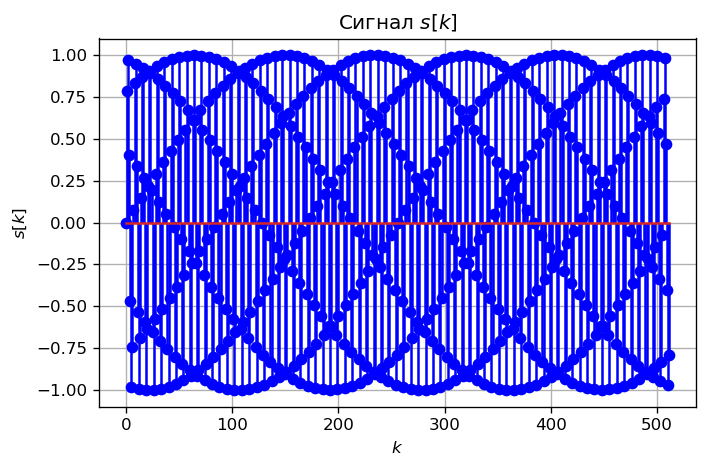

In [67]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
plt.stem(k, s, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$s[k]$")
plt.title("Сигнал $s[k]$")
plt.grid()
plt.tight_layout()
plt.show()

In [68]:
k_series =  np.random.randint(0, P, P)
nu_series = k_series / P

In [69]:
%%timeit
S_dtft_an_series = 0.5j * (-dirichlet_kernel(nu_series - nu0, N=N) + dirichlet_kernel(nu_series + nu0, N=N))

23.8 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
%%timeit
S_dtft_num = np.fft.fft(s, P)
S_dtft_num_series = S_dtft_num[k_series]

3.81 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [71]:
S_dtft_an_series = 0.5j * (-dirichlet_kernel(nu_series - nu0, N=N) + dirichlet_kernel(nu_series + nu0, N=N))

S_dtft_num = np.fft.fft(s, P)
S_dtft_num_series = S_dtft_num[k_series]

In [72]:
np.allclose(S_dtft_num_series, S_dtft_an_series), np.max(np.abs(S_dtft_num_series-S_dtft_an_series)**2)

(True, 4.769278650529973e-21)

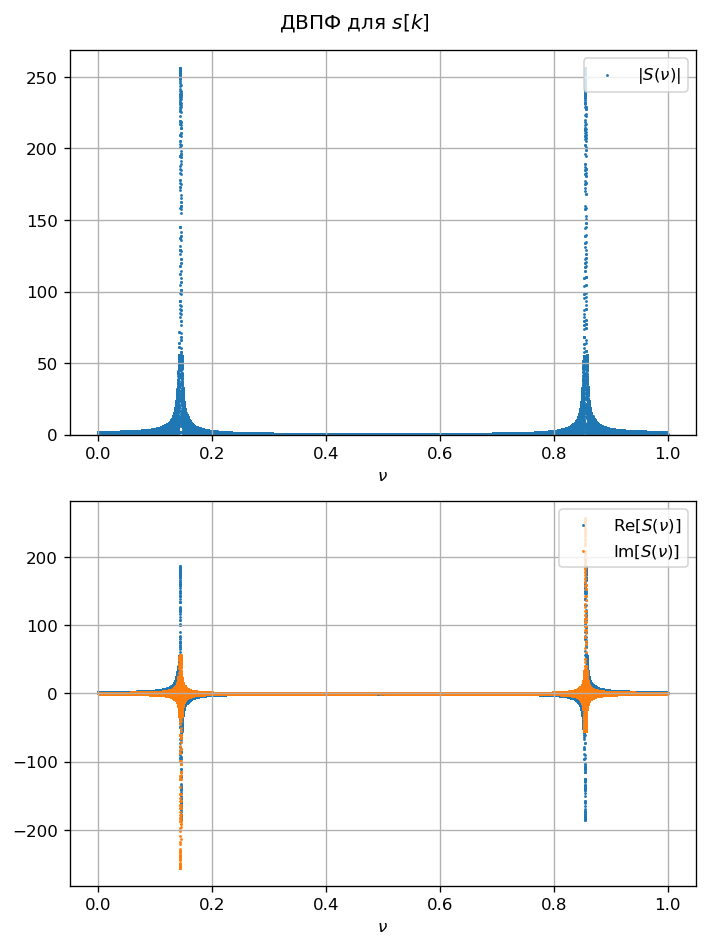

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), dpi=120)
fig.suptitle(f"ДВПФ для $s[k]$")
ax[0].scatter(nu_series, np.abs(S_dtft_an_series), label='$|S(\\nu)|$', s=0.5)
ax[0].set_xlabel("$\\nu$") 
ax[0].set_ylim([0, None])
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].scatter(nu_series, np.real(S_dtft_an_series), label='Re$[S(\\nu)]$', s=0.5)
ax[1].scatter(nu_series, np.imag(S_dtft_an_series), label='Im$[S(\\nu)]$', s=0.5)
ax[1].set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax[1].legend(loc='upper right')
ax[1].grid()

plt.tight_layout()
plt.show()

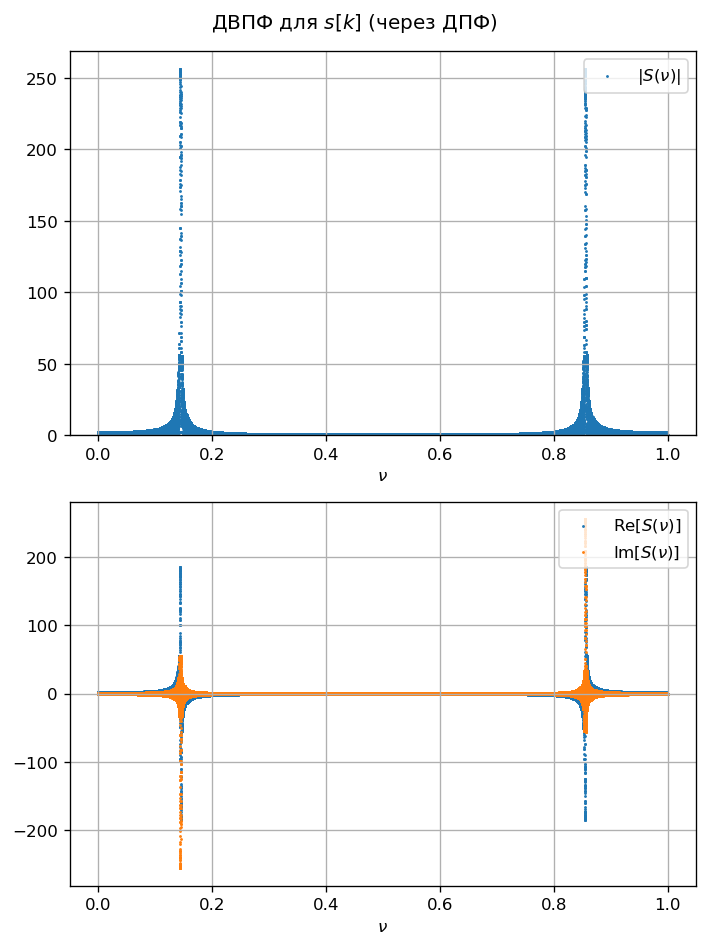

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), dpi=120)
fig.suptitle(f"ДВПФ для $s[k] $ (через ДПФ)")
ax[0].scatter(nu_series, np.abs(S_dtft_num_series), label='$|S(\\nu)|$', s=0.5)
ax[0].set_xlabel("$\\nu$") 
ax[0].set_ylim([0, None])
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].scatter(nu_series, np.real(S_dtft_num_series), label='Re$[S(\\nu)]$', s=0.5)
ax[1].scatter(nu_series, np.imag(S_dtft_num_series), label='Im$[S(\\nu)]$', s=0.5)
ax[1].set_xlabel("$\\nu$") # подпись горизонтальной оси, $ — для формул
ax[1].legend(loc='upper right')
ax[1].grid()

plt.tight_layout()
plt.show()

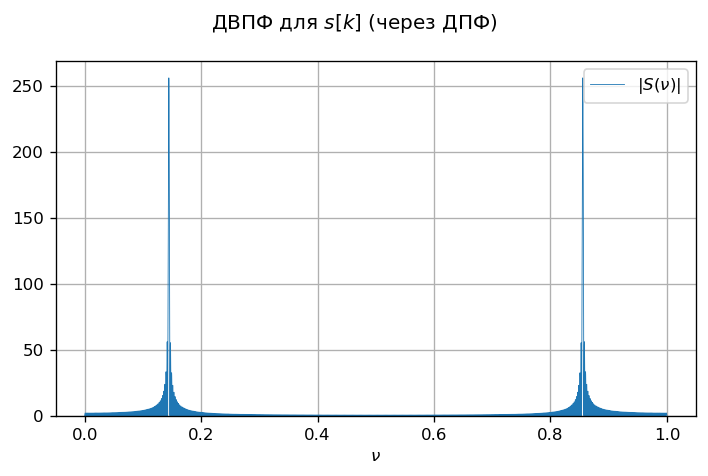

In [75]:
nu =  np.arange(0, 1, 1/P)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=120)
fig.suptitle(f"ДВПФ для $s[k] $ (через ДПФ)")
ax.plot(nu, np.abs(S_dtft_num), label='$|S(\\nu)|$', lw=0.5)
ax.set_xlabel("$\\nu$") 
ax.set_ylim([0, None])
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()
plt.show()

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [76]:
from IPython.display import Audio

In [77]:
audio_path = r'wav_files\flute.wav'

In [78]:
Audio(audio_path)

In [79]:
fs, x1 = sp.io.wavfile.read(audio_path)
dt = 1/fs

In [80]:
print(f'Fs = {fs}Гц')

Fs = 48000Гц


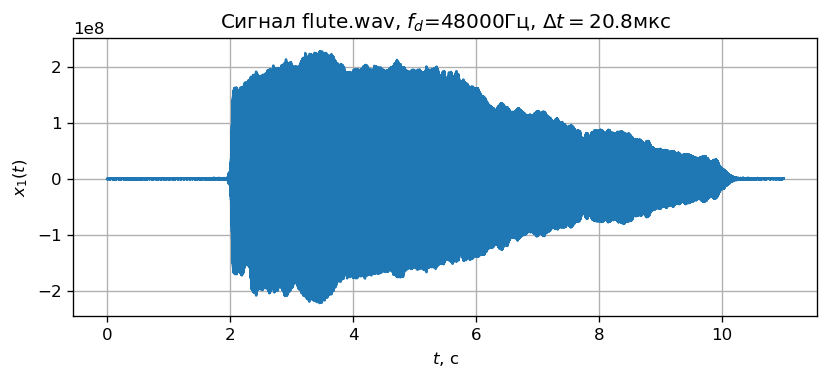

In [81]:
plt.figure(figsize=[8, 3], dpi=120)
plt.plot(np.arange(x1.size)/fs, x1)
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x_1(t)$')
plt.title(f'Сигнал flute.wav, $f_d$={fs}Гц, $\Delta t=${dt*1e6:.1f}мкc')
plt.grid()

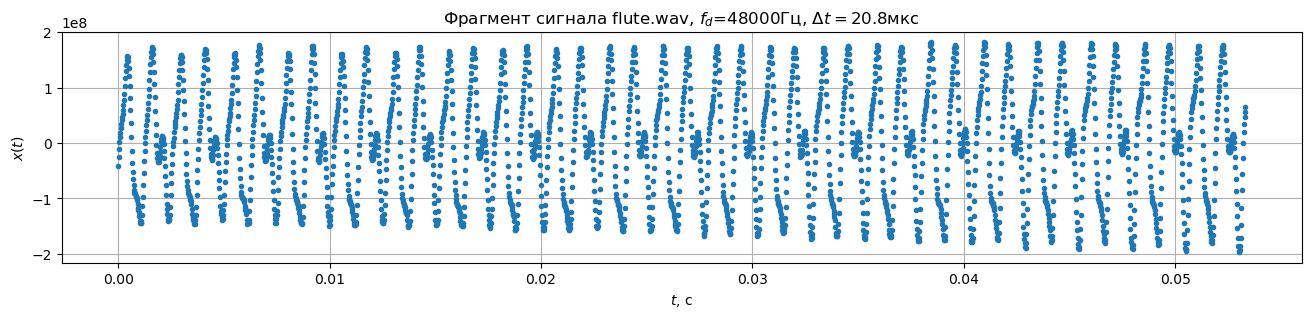

In [82]:
time_duration = 2560
time_delay = 110400

x=x1[time_delay:(time_delay+time_duration)]

plt.figure(figsize=[16, 3])
plt.plot(np.arange(x.size)/fs, x, '.')
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title(f'Фрагмент сигнала flute.wav, $f_d$={fs}Гц, $\Delta t=${dt*1e6:.1f}мкc')
plt.grid()

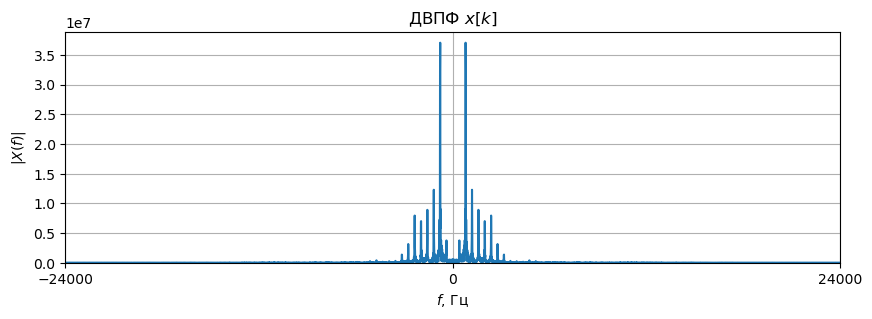

In [83]:
plt.figure(figsize=[10, 3], dpi=100)
M=4096
plt.plot((-0.5+(np.arange(M)/M))*fs, abs(np.fft.fftshift(np.fft.fft(x, M)))/M)
plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
plt.xticks([-fs/2, 0, fs/2])

plt.title(u'ДВПФ $x[k]$')
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()